In [1]:
import pandas as pd
import numpy as np

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

In [3]:
import matplotlib
import matplotlib.pyplot as plt  # 파이플롯 사용
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')  # 한글코드를 더 선명하게 해주는 조치, 레티나 설정
matplotlib.rc('font', family='AppleGothic') # 폰트 설정
matplotlib.rc('axes', unicode_minus=False) # 마이너스 폰트가 깨지는 경우가 있으므로 조치

In [4]:
df = pd.read_csv("전라남도_축제별방문객현황.csv", encoding='euc-kr', engine='python')

In [5]:
df = df.drop(['연번', '시도명', '주최/주관', '담당자 연락처', '개최장소', '데이터기준일자', 'Unnamed: 16'], axis=1)

In [6]:
df.columns = ['district', 'fest_name', 'fest_19_month', 'contents', '17_total', '17_kor', '17_for', '18_total', '18_kor', '18_for']


### 전처리1. 19년 축제 개최일을 개최월로 변경

In [7]:
def festival_month(date):
    date1 = date.split('/')[0]
    
    if '월' in(date1):
        return int(date1.split('월')[0])
    if '가을' in(date1):
        return 10
    else:
        return int(list(str(date1))[0])

In [8]:
df['fest_19_month'] = df['fest_19_month'].apply(festival_month)

### 전처리2. 17년, 18년 참가자 숫자처리

*17년은 1000명 단위이고, 18년은 1명 단위라는 걸 명심하자*

- 외국인 파트가 nan 이면 0으로 처리한다
- 내국인 파트가 nan 이면 해당 연도의 데이터는 폐기한다 (모두 nan 처리)

In [9]:
df.loc[df['17_for'].isnull(), '17_for'] = 0

In [10]:
df.loc[df['17_kor'].isnull(), ['17_total','17_kor','17_for']] = 0

In [11]:
df.loc[df['18_for'].isnull(), '18_for'] = 0

In [12]:
df.loc[df['18_kor'].isnull(), ['18_total','18_kor','18_for']] = 0

In [13]:
df.iloc[105, 9] = 0
df.iloc[106, 9] = 0

In [14]:
df['18_for'] = df['18_for'].astype(int)

In [15]:
df['18_kor'] = (df['18_kor']/1000).astype(int)
df['18_for'] = (df['18_for']/1000).astype(int)


In [16]:
df['17_kor'] = df['17_kor'].astype(int)
df['17_for'] = df['17_for'].astype(int)

In [17]:
df = df.drop(['17_total', '18_total'], axis=1)
df['17_total'] = df['17_kor'] + df['17_for']
df['18_total'] = df['18_kor'] + df['18_for']

In [18]:
df_normal = df.loc[(df['17_total'] & df['18_total']) > 0]
df_normal.shape

(77, 10)

In [19]:
df_normal['year'] = ""

/Users/taewoongkong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_normal_17 =  df_normal
df_normal_18 =  df_normal

df_normal_17 = df_normal_17.drop(['18_kor', '18_for', '18_total'], axis = 1)
df_normal_18 = df_normal_18.drop(['17_kor', '17_for', '17_total'], axis = 1)

In [21]:
df_normal_17['year'] = 2017
df_normal_18['year'] = 2018

In [22]:
df_normal_18.columns = ['district', 'fest_name', 'fest_19_month', 'contents', 'kor', 'for', 'total', 'year']
df_normal_17.columns = ['district', 'fest_name', 'fest_19_month', 'contents', 'kor', 'for', 'total', 'year']

In [23]:
df_concat = pd.concat([df_normal_17, df_normal_18])

In [24]:
df_concat_multi = df_concat.sort_values(by='fest_name', ascending=False).set_index(['fest_name', 'year'])
df_concat_multi

district  fest_19_month  \
fest_name                            year                           
회령포 문화축제                             2018      장흥군              9   
                                     2017      장흥군              9   
화순운주문화축제                             2018      화순군              5   
                                     2017      화순군              5   
화순동구리호수공원봄축제                         2018      화순군              4   
                                     2017      화순군              4   
화순고인돌문화축제                            2018      화순군              4   
                                     2017      화순군              4   
향일암일출제                               2017      여수시              1   
                                     2018      여수시              1   
축령산편백산소축제                            2018      장성군              9   
                                     2017      장성군              9   
지리산남악제 및  군민의날 행사                    2017      구례군              4   
                                     2018      구례군              4   
제9회 곡성세계장미 축제                        2018      곡성군              5   
                                     2017      곡성군              5   
제7회 무안황토갯벌 축제                        2017      무안군              6   
                                     2018      무안군              6   
제4회 강진만 춤추는 갈대축제                     2017      강진군              1   
                                     2018      강진군              1   
제47회 강진청자축제                          2017      강진군              1   
                                     2018      강진군              1   
제45회보성다향 대축제                         2017      보성군              5   
                                     2018      보성군              5   
제43회 지리산피아골 단풍축제                     2018      구례군             11   
                                     2017      구례군             11   
제41회 진도신비의 바닷길축제                     2017      진도군              3   
                                     2018      진도군              3   
제25회 남도음식문화큰잔치                       2018      도자체              1   
                                     2017      도자체              1   
제23회 무안연꽃축제                          2017      무안군              7   
                                     2018      무안군              7   
제22회 전라병영성축제                         2018      강진군              4   
                                     2017      강진군              4   
제22회 서편제보성소리축제                       2017      보성군              5   
                                     2018      보성군              5   
제21회 함평나비 대축제                        2017      함평군              4   
                                     2018      함평군              4   
제20회 구례산수유꽃 축제                       2018      구례군              3   
                                     2017      구례군              3   
제19회 곡성심청축제                          2017      곡성군              1   
                                     2018      곡성군              1   
제16회보성차밭빛축제                          2018      보성군             12   
                                     2017      보성군             12   
제16회 영랑문학제                           2018      강진군              4   
                                     2017      강진군              4   
제15회 구례섬진강 벚꽃축제                      2018      구례군              3   
                                     2017      구례군              3   
제12회 고흥우주항공축제                        2017      고흥군              5   
                                     2018      고흥군              5   
정원갈대축제                               2018      순천시              9   
                                     2017      순천시              9   
정남진장흥키조개축제                           2017      장흥군              5   
                                     2018      장흥군              5   
정남진 장흥 물축제                           2018      장흥군              7   
                                     2017      장흥군              7   
장평귀족호도축제                             201

In [25]:
# 17,18 년 참가자 합이 가장 많은 최고 인기 축제 5선을 뽑아 인덱스를 통해 리스트로 저장합니다
top_fest_list = list(df_concat.pivot_table(values= 'total', index = 'fest_name', aggfunc='sum').sort_values(by='total', ascending=False).head(5).index)


In [26]:
# 최고 인기 축제가 무엇인지 한번 살펴봅니다

df_concat_multi.reset_index().loc[df_concat_multi.reset_index()['fest_name'].isin(top_fest_list)]

,fest_name,year,district,fest_19_month,contents,kor,for,total
58,장성 황룡강 노란꽃잔치,2017,장성군,10,○ 가을 노란꽃을 테마로 한 조형물 전시 ○ 남녀노소 누구나 즐길 수 있는 체험프로...,987,0,987
59,장성 황룡강 노란꽃잔치,2018,장성군,10,○ 가을 노란꽃을 테마로 한 조형물 전시 ○ 남녀노소 누구나 즐길 수 있는 체험프로...,933,0,933
62,월출산국화축제,2017,영암군,10,"○ 국화 분화 및 조형물 설치 ○ 공연행사, 체험행사, 부대행사 등 - 5개분야...",668,21,689
63,월출산국화축제,2018,영암군,10,"○ 국화 분화 및 조형물 설치 ○ 공연행사, 체험행사, 부대행사 등 - 5개분야...",718,30,748
122,광양매화축제,2017,광양시,3,"○ 꾼들의 매화랑 섬진강 이야기 , 영호남 화합행사 ○ 매화, 매실을 테마로 공연,...",1166,0,1166
123,광양매화축제,2018,광양시,3,"○ 꾼들의 매화랑 섬진강 이야기 , 영호남 화합행사 ○ 매화, 매실을 테마로 공연,...",1487,15,1502
138,2019 봄꽃축제,2018,순천시,4,○ 마칭퍼레이드쇼 ○ 1억송이 봄꽃연출 ○ 전시체험행사,1241,0,1241
139,2019 봄꽃축제,2017,순천시,4,○ 마칭퍼레이드쇼 ○ 1억송이 봄꽃연출 ○ 전시체험행사,1389,1,1390
140,2019 물빛축제,2017,순천시,7,○ 라이트 가든연출 ○ 워터라이팅쇼 ○ 가면무도회,802,0,802
141,2019 물빛축제,2018,순천시,7,○ 라이트 가든연출 ○ 워터라이팅쇼 ○ 가면무도회,344,0,344


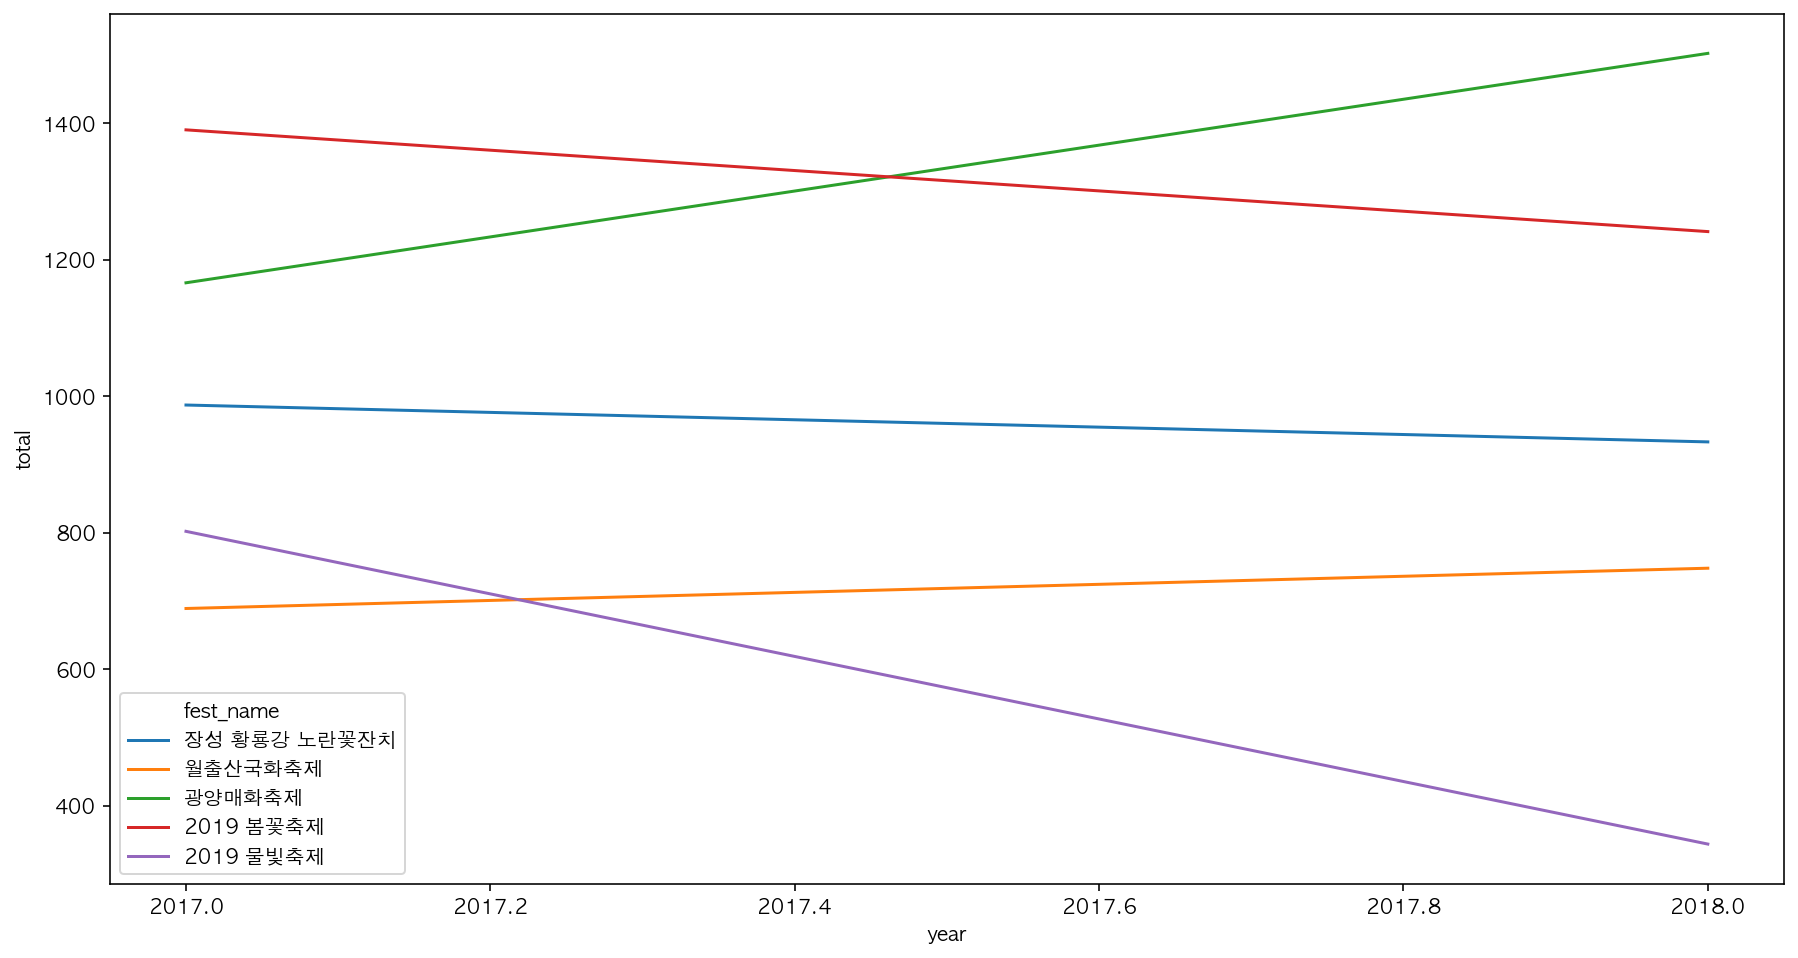

In [27]:
# 인기축제의 17년 - 18년 간의 참가자 증감폭을 시각화합니다

plt.figure(figsize = (15,8))
sns.lineplot(data = df_concat_multi.reset_index().loc[df_concat_multi.reset_index()['fest_name'].isin(top_fest_list)], hue = 'fest_name', x = 'year', y = 'total')


### 떡상 축제와 떡락 축제 각 10선씩을 뽑아봅시다

1. 기준 하나) 폭의 기준은 단순 "차" 로 계산하도록합니다
2. 기준 둘) 폭을 비율로 계산해봅시다

In [29]:
# 차를 구하는 pd.Series를 변수로 저장합시다
gap = pd.Series(df_concat.loc[df_concat['year']==2018, 'total'] - df_concat.loc[df_concat['year']==2017, 'total'])
up_top_list = list(gap.sort_values(ascending=False).head(10).index)
down_top_list = list(gap.sort_values().head(10).index)

In [30]:
up_gap = gap[up_top_list]
up_fest_temp = df_concat.loc[df_concat.index.isin(up_top_list), 'fest_name']
up_fest_index = df_concat.loc[df_concat['fest_name'].isin(up_fest_temp)].index.unique()
up_fest = df_normal_17.loc[df_normal_17.index.isin(up_fest_index), 'fest_name']
up_gap_df = pd.DataFrame(index=up_gap.index, data = up_gap)
up_fest_df = pd.DataFrame(index=up_fest.index, data = up_fest)
up_fest_gap = up_gap_df.reset_index().merge(up_fest_df.reset_index())
up_fest_gap.set_index('index').sort_values(by='total', ascending=False)

,total,fest_name
index,,
20,536,정원갈대축제
25,336,광양매화축제
21,166,별빛축제
93,149,백양단풍축제
22,97,나주마한문화축제
12,83,순천만갈대축제
14,66,순천문화재달빛야행
75,59,월출산국화축제
36,58,제20회 구례산수유꽃 축제


In [31]:
down_gap = gap[down_top_list]
down_fest_temp = df_concat.loc[df_concat.index.isin(down_top_list), 'fest_name']
down_fest_index = df_concat.loc[df_concat['fest_name'].isin(down_fest_temp)].index.unique()
down_fest = df_normal_17.loc[df_normal_17.index.isin(down_fest_index), 'fest_name']
down_gap_df = pd.DataFrame(index=down_gap.index, data = down_gap)
down_fest_df = pd.DataFrame(index=down_fest.index, data = down_fest)
down_fest_gap = down_gap_df.reset_index().merge(down_fest_df.reset_index())
down_fest_gap.set_index('index').sort_values(by='total')

,total,fest_name
index,,
19,-458,2019 물빛축제
89,-260,영광불갑산상사화축제
18,-149,2019 봄꽃축제
66,-115,제47회 강진청자축제
78,-84,제23회 무안연꽃축제
4,-62,여수거북선축제
82,-56,2019 꽃무릇큰잔치
91,-54,장성 황룡강 노란꽃잔치
29,-50,광양전통숯불구이축제


In [33]:
# 비율?

gap_portion = pd.Series(df_concat.loc[df_concat['year']==2018, 'total'] / df_concat.loc[df_concat['year']==2017, 'total'])
up_top_list_portion = list(gap_portion.sort_values(ascending=False).head(10).index)
down_top_list_portion = list(gap.sort_values().head(10).index)


In [34]:
up_gap_portion = gap_portion[up_top_list_portion]
up_fest_temp_portion = df_concat.loc[df_concat.index.isin(up_top_list_portion), 'fest_name']
up_fest_index_portion = df_concat.loc[df_concat['fest_name'].isin(up_fest_temp_portion)].index.unique()
up_fest_portion = df_normal_17.loc[df_normal_17.index.isin(up_fest_index_portion), 'fest_name']
up_gap_df_portion = pd.DataFrame(index=up_gap_portion.index, data = up_gap_portion)
up_fest_df_portion = pd.DataFrame(index=up_fest_portion.index, data = up_fest_portion)
up_fest_gap_portion = up_gap_df_portion.reset_index().merge(up_fest_df_portion.reset_index())
up_fest_gap_portion.set_index('index').sort_values(by='total', ascending=False)

,total,fest_name
index,,
12,10.222222,순천만갈대축제
11,5.000000,순천명품 월등복숭아 체험행사
20,4.458065,정원갈대축제
93,2.655556,백양단풍축제
21,2.509091,별빛축제
22,2.426471,나주마한문화축제
50,1.933333,보성전어축제
16,1.833333,순천만국제교향악축제
15,1.727273,순천만세계동물영화제


In [35]:
down_gap_portion = gap_portion[down_top_list_portion]
down_fest_temp_portion = df_concat.loc[df_concat.index.isin(down_top_list_portion), 'fest_name']
down_fest_index_portion = df_concat.loc[df_concat['fest_name'].isin(down_fest_temp_portion)].index.unique()
down_fest_portion = df_normal_17.loc[df_normal_17.index.isin(down_fest_index_portion), 'fest_name']
down_gap_df_portion = pd.DataFrame(index=down_gap_portion.index, data = down_gap_portion)
down_fest_df_portion = pd.DataFrame(index=down_fest_portion.index, data = down_fest_portion)
down_fest_gap_portion = down_gap_df_portion.reset_index().merge(down_fest_df_portion.reset_index())
down_fest_gap_portion.set_index('index').sort_values(by='total')

,total,fest_name
index,,
82,0.096774,2019 꽃무릇큰잔치
106,0.333333,신안 증도 슬로시티 보물찾기 (축제 취소-년중 관광상품으로 전환)
19,0.428928,2019 물빛축제
89,0.573770,영광불갑산상사화축제
78,0.575758,제23회 무안연꽃축제
66,0.647239,제47회 강진청자축제
29,0.833333,광양전통숯불구이축제
4,0.847666,여수거북선축제
18,0.892806,2019 봄꽃축제
